In [73]:
#Load any necessary libraries.
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import warnings 

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder 
from sklearn.impute import SimpleImputer
from sklearn import metrics

# Supervised Learning
from sklearn.ensemble import RandomForestClassifier

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.cluster import silhouette_score

from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
pd.set_option('display.max_columns', 100)
pd.set_option("display.precision", 2)


%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [74]:
#Load and explore the datasets
# Define column names
column_names = ["Age", "Workclass", "Fnlwgt", "Education", "Education-Num", 
                "Marital-Status", "Occupation", "Relationship", "Race", 
                "Sex", "Capital-Gain", "Capital-Loss", "Hours-Per-Week", 
                "Native-Country", "Income"]
adultData = pd.read_csv("C:\\Users\\vaspi\\Downloads\\data\\classification\\adult.data", header=None, names=column_names)
adultTest = pd.read_csv("C:\\Users\\vaspi\\Downloads\\data\\classification\\adult.test",header=None, names=column_names, skiprows=1)


In [75]:
# Print the dimensionality of adult Data and preview its first rows
print(adultData.shape)
adultData.head()

(32561, 15)


,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [76]:
#print the dimensionality of test set
print(adultTest.shape)
adultTest.head()

(16281, 15)


,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [77]:
#some observations here are:
#First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them.
#Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale.

In [78]:
# Drop any duplicate rows in the data. Optional: perform sanity checks to ensure your changes have gone through
adultData.drop_duplicates(inplace = True)
adultData.shape

(32537, 15)

In [79]:
# Get the data types or relevant info of adult Data
adultData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32537 non-null  int64 
 1   Workclass       32537 non-null  object
 2   Fnlwgt          32537 non-null  int64 
 3   Education       32537 non-null  object
 4   Education-Num   32537 non-null  int64 
 5   Marital-Status  32537 non-null  object
 6   Occupation      32537 non-null  object
 7   Relationship    32537 non-null  object
 8   Race            32537 non-null  object
 9   Sex             32537 non-null  object
 10  Capital-Gain    32537 non-null  int64 
 11  Capital-Loss    32537 non-null  int64 
 12  Hours-Per-Week  32537 non-null  int64 
 13  Native-Country  32537 non-null  object
 14  Income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [80]:
#we have some categorical features(object) and some numerical(int64)
#The categorical data should be converting into numerical, so that we can feed/train out models later
#Also,the column Annual income is categorical variable(is our target variable).

In [81]:
# Check for missing values per column 
adultData.isnull().sum()
#or
#adultData.isna().any()
#missing = pd.DataFrame({'percent_missing': adultData.isnull().sum() * 100 / len(adultData)})
#missing

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-Num     0
Marital-Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-Per-Week    0
Native-Country    0
Income            0
dtype: int64

In [82]:
# we don't have missing values
# in the case that we had, We can either drop the missing values (naive) or impute them with the help of an imputer (e.g: SimpleImputer) and 
# select the strategy of the imputation

In [83]:
# Get the data types or relevant info of test set 

# adultTest.dtypes
adultTest.info() #we don't have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       16281 non-null  object
 2   Fnlwgt          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education-Num   16281 non-null  int64 
 5   Marital-Status  16281 non-null  object
 6   Occupation      16281 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital-Gain    16281 non-null  int64 
 11  Capital-Loss    16281 non-null  int64 
 12  Hours-Per-Week  16281 non-null  int64 
 13  Native-Country  16281 non-null  object
 14  Income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [84]:
#FEATURE CREATION
adultData["Is_Married"] = adultData["Marital-Status"].apply(lambda x: 1 if "Married" in x else 0)
adultTest["Is_Married"] = adultTest["Marital-Status"].apply(lambda x: 1 if "Married" in x else 0)


In [85]:
def simplify_occupation(occ):
    if occ in ["Exec-managerial", "Prof-specialty"]:
        return "High-skill"
    elif occ in ["Handlers-cleaners", "Machine-op-inspct", "Craft-repair"]:
        return "Blue-collar"
    else:
        return "Other"

adultData["Occupation_Simplified"] = adultData["Occupation"].str.strip().apply(simplify_occupation)
adultTest["Occupation_Simplified"] = adultTest["Occupation"].str.strip().apply(simplify_occupation)

In [86]:
adultData["Is_White"] = adultData["Race"].str.strip().apply(lambda x: 1 if x == "White" else 0)
adultTest["Is_White"] = adultTest["Race"].str.strip().apply(lambda x: 1 if x == "White" else 0)

adultData["Is_Male"] = adultData["Sex"].str.strip().apply(lambda x: 1 if x == "Male" else 0)
adultTest["Is_Male"] = adultTest["Sex"].str.strip().apply(lambda x: 1 if x == "Male" else 0)

In [87]:
# Drop the unnecessary features 
 
adultData = adultData.drop(["Fnlwgt", "Education","Sex","Race","Occupation"], axis=1)
adultTest = adultTest.drop(["Fnlwgt", "Education","Sex","Race","Occupation"], axis=1)

In [88]:
adultData.head()


,Age,Workclass,Education-Num,Marital-Status,Relationship,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income,Is_Married,Occupation_Simplified,Is_White,Is_Male
0,39,State-gov,13,Never-married,Not-in-family,2174,0,40,United-States,<=50K,0,Other,1,1
1,50,Self-emp-not-inc,13,Married-civ-spouse,Husband,0,0,13,United-States,<=50K,1,High-skill,1,1
2,38,Private,9,Divorced,Not-in-family,0,0,40,United-States,<=50K,0,Blue-collar,1,1
3,53,Private,7,Married-civ-spouse,Husband,0,0,40,United-States,<=50K,1,Blue-collar,0,1
4,28,Private,13,Married-civ-spouse,Wife,0,0,40,Cuba,<=50K,1,High-skill,0,0


In [89]:
adultTest.head()

,Age,Workclass,Education-Num,Marital-Status,Relationship,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income,Is_Married,Occupation_Simplified,Is_White,Is_Male
0,25,Private,7,Never-married,Own-child,0,0,40,United-States,<=50K.,0,Blue-collar,0,1
1,38,Private,9,Married-civ-spouse,Husband,0,0,50,United-States,<=50K.,1,Other,1,1
2,28,Local-gov,12,Married-civ-spouse,Husband,0,0,40,United-States,>50K.,1,Other,1,1
3,44,Private,10,Married-civ-spouse,Husband,7688,0,40,United-States,>50K.,1,Blue-collar,0,1
4,18,?,10,Never-married,Own-child,0,0,30,United-States,<=50K.,0,Other,1,0


In [90]:
# Get the class frequencies/counts of the target variable from your adultData in a tabular format 
adultData["Income"].value_counts()

Income
<=50K    24698
>50K      7839
Name: count, dtype: int64

In [91]:
# we have an imbalance in our dependent variable.
# This is not good for our models, because this tends to affect the generalization capability of our models.

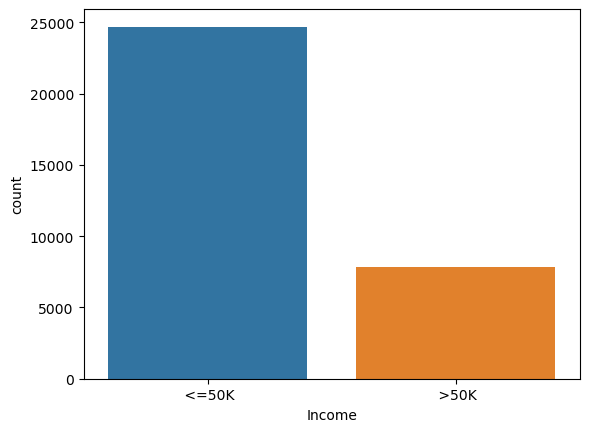

In [92]:
# Visualize the class frequencies/counts of the target variable 
sns.countplot(x='Income',hue='Income', data=adultData)
plt.show();

In [93]:
# Check the summary statistics   
sum_stats = adultData.describe()
sum_stats

,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Is_Married,Is_White,Is_Male
count,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00
mean,38.59,10.08,1078.44,87.37,40.44,0.47,0.85,0.67
std,13.64,2.57,7387.96,403.10,12.35,0.50,0.35,0.47
min,17.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,28.00,9.00,0.00,0.00,40.00,0.00,1.00,0.00
50%,37.00,10.00,0.00,0.00,40.00,0.00,1.00,1.00
75%,48.00,12.00,0.00,0.00,45.00,1.00,1.00,1.00
max,90.00,16.00,99999.00,4356.00,99.00,1.00,1.00,1.00


In [94]:
# may have outliers in capital-gain and capital-loss 
#Also, we can see that the 47% of individuals are married, 85% are white, 67% are male.

C:\Users\vaspi\AppData\Local\Temp\ipykernel_13604\2787278745.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels())


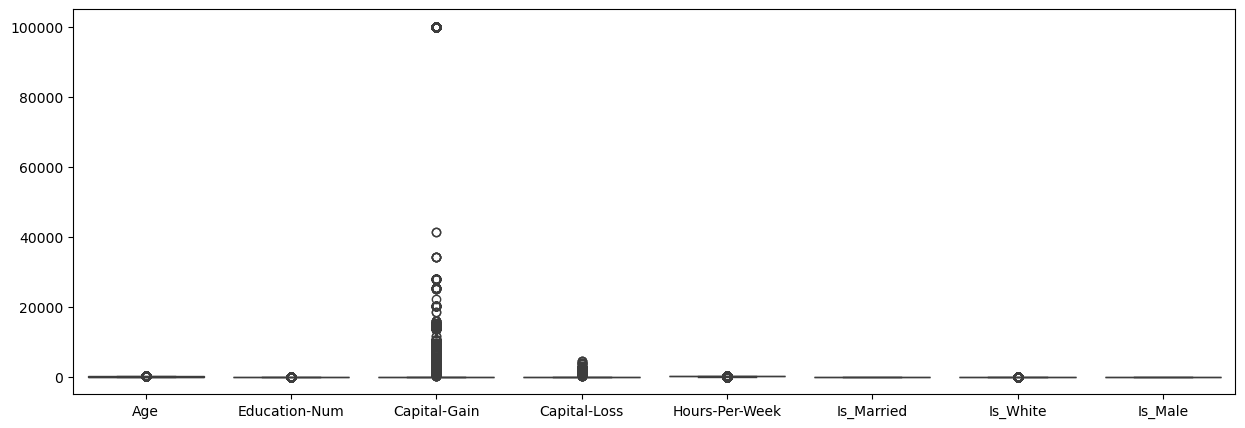

In [95]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=adultData)
ax.set_xticklabels(ax.get_xticklabels())
plt.show();

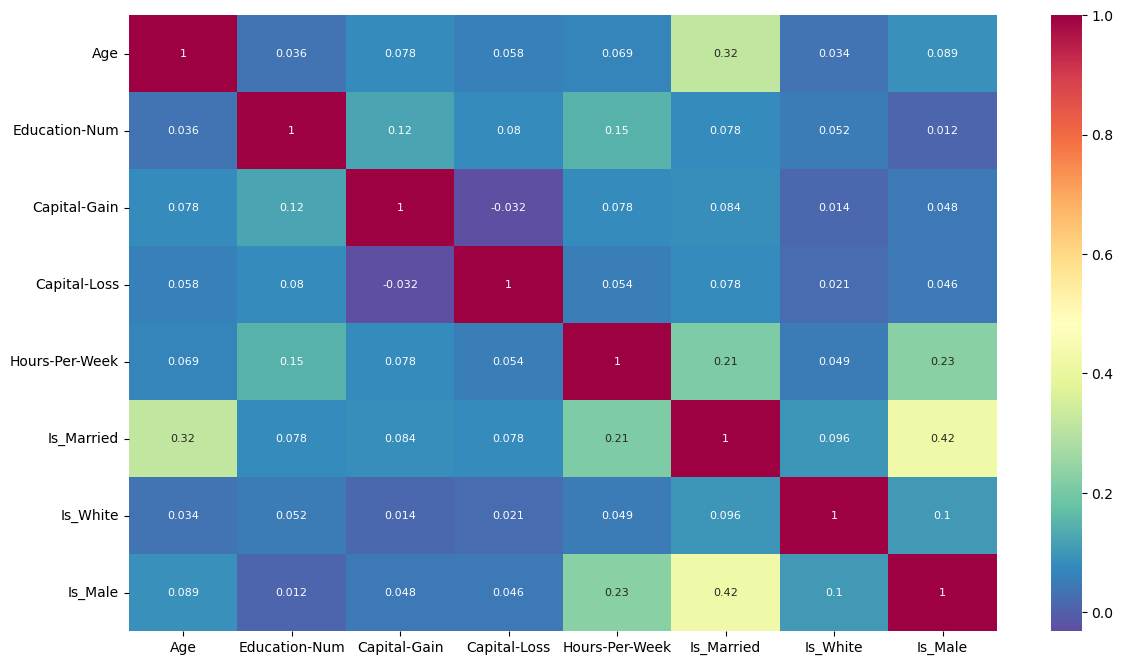

In [96]:
# Calculate the Pearson correlation coefficients of adult data  
corr_matrix = adultData.select_dtypes('number').corr()

f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            annot_kws={'size': 8}, 
            cmap="Spectral_r");

In [97]:
# there is a moderate positive (weak, r = 0.3/ strong, r=0.8)correlation between 'is male' and 'is married'. 
#this indicates that as the value of one increase, the other also increase

In [98]:
# Split to X and Y  
# x independent and y dependent
X = adultData.drop('Income', axis = 1)
y = adultData['Income']

print("X dimensions:",X.shape,"\n","y dimensions:",y.shape)

X dimensions: (32537, 13) 
 y dimensions: (32537,)


In [99]:
#we use the label endoder to convert the categorical variables into numerical.
le = LabelEncoder()
y = le.fit_transform(y) # with fit_transform will make the transformation (with values 0 and 1).
#This is the classification that our models will have to do later.

y #<=50k = 0 , >50k = 1

array([0, 0, 0, ..., 0, 0, 1])

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=0)

print('Shape of x_train and y_train: ', X_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',   X_test.shape,  y_test.shape)

Shape of x_train and y_train:  (22775, 13) (22775,)
Shape of x_test and y_test:  (9762, 13) (9762,)


In [101]:
# the validation technique is important because it ensures that models generalize well to unseen data. 
#in this case i set Stratify=y because it is crucial when dealing with imbalanced datasets, 
#stratification ensures the same distribution in both the training and test sets.

In [102]:
#sanity check: print the NAs per train/test dataset before the imputing
print("Nulls in X_train","-"*20)
print(X_train.isnull().sum())

print("Nulls in X_test","-"*20)
print(X_test.isnull().sum())

Nulls in X_train --------------------
Age                      0
Workclass                0
Education-Num            0
Marital-Status           0
Relationship             0
Capital-Gain             0
Capital-Loss             0
Hours-Per-Week           0
Native-Country           0
Is_Married               0
Occupation_Simplified    0
Is_White                 0
Is_Male                  0
dtype: int64
Nulls in X_test --------------------
Age                      0
Workclass                0
Education-Num            0
Marital-Status           0
Relationship             0
Capital-Gain             0
Capital-Loss             0
Hours-Per-Week           0
Native-Country           0
Is_Married               0
Occupation_Simplified    0
Is_White                 0
Is_Male                  0
dtype: int64


In [103]:
# we don't have missing values so we don't need the imputing

In [104]:
#print the data types 
print(X_train.dtypes)
print(X_test.dtypes)

Age                       int64
Workclass                object
Education-Num             int64
Marital-Status           object
Relationship             object
Capital-Gain              int64
Capital-Loss              int64
Hours-Per-Week            int64
Native-Country           object
Is_Married                int64
Occupation_Simplified    object
Is_White                  int64
Is_Male                   int64
dtype: object
Age                       int64
Workclass                object
Education-Num             int64
Marital-Status           object
Relationship             object
Capital-Gain              int64
Capital-Loss              int64
Hours-Per-Week            int64
Native-Country           object
Is_Married                int64
Occupation_Simplified    object
Is_White                  int64
Is_Male                   int64
dtype: object


In [105]:
# Encode the categorical features with One Hot Encoding (zeros and ones).
X_train_ohe = X_train[['Workclass', 'Marital-Status','Relationship', 'Native-Country', 'Occupation_Simplified']]
X_train_ohe = pd.get_dummies(X_train_ohe, dtype=int)

X_train = X_train.drop(['Workclass', 'Marital-Status','Relationship', 'Native-Country', 'Occupation_Simplified'], axis = 1)
X_train = X_train.join(X_train_ohe)

X_train.head()

,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Is_Married,Is_White,Is_Male,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Marital-Status_ Divorced,Marital-Status_ Married-AF-spouse,Marital-Status_ Married-civ-spouse,Marital-Status_ Married-spouse-absent,Marital-Status_ Never-married,Marital-Status_ Separated,Marital-Status_ Widowed,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Native-Country_ ?,Native-Country_ Cambodia,Native-Country_ Canada,Native-Country_ China,Native-Country_ Columbia,Native-Country_ Cuba,Native-Country_ Dominican-Republic,Native-Country_ Ecuador,Native-Country_ El-Salvador,Native-Country_ England,Native-Country_ France,Native-Country_ Germany,Native-Country_ Greece,Native-Country_ Guatemala,Native-Country_ Haiti,Native-Country_ Holand-Netherlands,Native-Country_ Honduras,Native-Country_ Hong,Native-Country_ Hungary,Native-Country_ India,Native-Country_ Iran,Native-Country_ Ireland,Native-Country_ Italy,Native-Country_ Jamaica,Native-Country_ Japan,Native-Country_ Laos,Native-Country_ Mexico,Native-Country_ Nicaragua,Native-Country_ Outlying-US(Guam-USVI-etc),Native-Country_ Peru,Native-Country_ Philippines,Native-Country_ Poland,Native-Country_ Portugal,Native-Country_ Puerto-Rico,Native-Country_ Scotland,Native-Country_ South,Native-Country_ Taiwan,Native-Country_ Thailand,Native-Country_ Trinadad&Tobago,Native-Country_ United-States,Native-Country_ Vietnam,Native-Country_ Yugoslavia,Occupation_Simplified_Blue-collar,Occupation_Simplified_High-skill,Occupation_Simplified_Other
17365,30,9,0,0,45,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
380,54,9,0,0,40,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
28968,29,4,0,0,55,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3476,18,7,0,0,35,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
25333,42,5,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [106]:
# apply ohe to the X_test set
X_test_ohe = X_test[['Workclass', 'Marital-Status','Relationship', 'Native-Country', 'Occupation_Simplified']]
X_test_ohe = pd.get_dummies(X_test_ohe, dtype=int)

X_test = X_test.drop(['Workclass', 'Marital-Status','Relationship', 'Native-Country', 'Occupation_Simplified'], axis = 1)
X_test = X_test.join(X_test_ohe)

X_test.head()

,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Is_Married,Is_White,Is_Male,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Marital-Status_ Divorced,Marital-Status_ Married-AF-spouse,Marital-Status_ Married-civ-spouse,Marital-Status_ Married-spouse-absent,Marital-Status_ Never-married,Marital-Status_ Separated,Marital-Status_ Widowed,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Native-Country_ ?,Native-Country_ Cambodia,Native-Country_ Canada,Native-Country_ China,Native-Country_ Columbia,Native-Country_ Cuba,Native-Country_ Dominican-Republic,Native-Country_ Ecuador,Native-Country_ El-Salvador,Native-Country_ England,Native-Country_ France,Native-Country_ Germany,Native-Country_ Greece,Native-Country_ Guatemala,Native-Country_ Haiti,Native-Country_ Honduras,Native-Country_ Hong,Native-Country_ Hungary,Native-Country_ India,Native-Country_ Iran,Native-Country_ Ireland,Native-Country_ Italy,Native-Country_ Jamaica,Native-Country_ Japan,Native-Country_ Laos,Native-Country_ Mexico,Native-Country_ Nicaragua,Native-Country_ Outlying-US(Guam-USVI-etc),Native-Country_ Peru,Native-Country_ Philippines,Native-Country_ Poland,Native-Country_ Portugal,Native-Country_ Puerto-Rico,Native-Country_ Scotland,Native-Country_ South,Native-Country_ Taiwan,Native-Country_ Thailand,Native-Country_ Trinadad&Tobago,Native-Country_ United-States,Native-Country_ Vietnam,Native-Country_ Yugoslavia,Occupation_Simplified_Blue-collar,Occupation_Simplified_High-skill,Occupation_Simplified_Other
6533,35,14,13550,0,55,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6444,51,9,0,0,38,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
27909,27,9,0,0,40,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
17046,56,10,0,0,40,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
27573,50,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [107]:
#apply scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Native-Country_ Holand-Netherlands
- Workclass_ Never-worked
